In [1]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\Nitish Borade\ffmpeg-master-latest-win64-gpl\bin\ffmpeg.exe'

In [2]:
from phi.flow import *

In [3]:
smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))  # sampled at cell centers
velocity = StaggeredGrid(0, extrapolation.ZERO, x=32, y=40, bounds=Box(x=32, y=40))  # sampled in staggered form at face centers

In [4]:
INFLOW_LOCATION = tensor([(4, 5), (8, 5), (12, 5), (16, 5)], batch('inflow_loc'), channel(vector='x,y'))
INFLOW = 0.6 * CenteredGrid(Sphere(center=INFLOW_LOCATION, radius=3), extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))

In [5]:
print(f"Smoke: {smoke.shape}")
print(f"Velocity: {velocity.shape}")
print(f"Inflow: {INFLOW.shape}")
print(f"Inflow, spatial only: {INFLOW.shape.spatial}")

Smoke: (xˢ=32, yˢ=40)
Velocity: (xˢ=32, yˢ=40, vectorᶜ=x,y)
Inflow: (inflow_locᵇ=4, xˢ=32, yˢ=40)
Inflow, spatial only: (xˢ=32, yˢ=40)


In [6]:
print(smoke.values)
print(velocity.values)
print(INFLOW.values)

(xˢ=32, yˢ=40) const 0.0
(xˢ=(x=31, y=32), yˢ=(x=40, y=39), vectorᶜ=x,y) const 0.0
(inflow_locᵇ=4, xˢ=32, yˢ=40) 0.015 ± 0.094 (0e+00...6e-01)


<Figure size 1200x500 with 5 Axes>

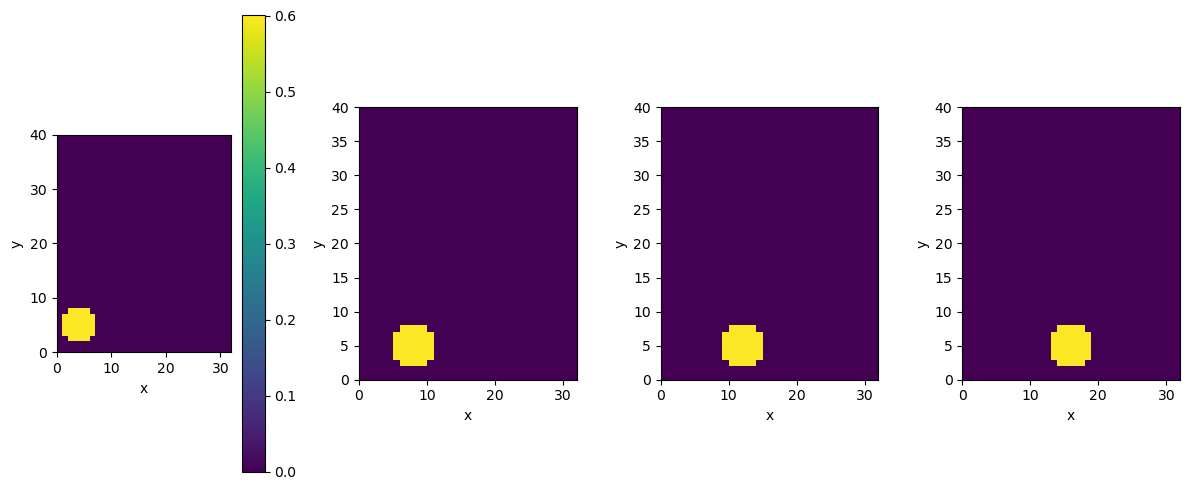

In [7]:
smoke += INFLOW
buoyancy_force = smoke * (0, 0.5) @ velocity
velocity += buoyancy_force
velocity, _ = fluid.make_incompressible(velocity)

vis.plot(smoke)

In [8]:
trajectory = [smoke]
for i in range(20):
  print(i, end=' ')
  smoke = advect.mac_cormack(smoke, velocity, dt=1) + INFLOW
  buoyancy_force = smoke * (0, 0.5) @ velocity
  velocity = advect.semi_lagrangian(velocity, velocity, dt=1) + buoyancy_force
  velocity, _ = fluid.make_incompressible(velocity)
  trajectory.append(smoke)
trajectory = field.stack(trajectory, batch('time'))
vis.plot(trajectory, animate='time')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

<Figure size 640x480 with 0 Axes>

In [9]:
#pip install ffmpeg-python

In [10]:
from phi.torch.flow import *

In [18]:
dir(smoke)

['__abs__',
 '__add__',
 '__class__',
 '__concat__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__value_attrs__',
 '__variable_attrs__',
 '__weakref__',
 '_bounds',
 '_elements',
 '_extrapolation',
 '_op1',
 '_op2',
 '_resolution',
 '_sample',
 '_shift_resample',
 '_values',
 'at',
 'bounds',
 'box',
 'closest_values',
 'data',
 'dimension',
 'dx',
 'elements',
 'extrapolation',
 'points',
 'resolution',
 'shape',
 

In [20]:
dir(smoke.points)

['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_ufunc__',
 '__bool__',
 '__cast__',
 '__class__',
 '__complex__',
 '__concat__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pack_dims__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__t

In [33]:
dir(smoke)

['__abs__',
 '__add__',
 '__class__',
 '__concat__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__value_attrs__',
 '__variable_attrs__',
 '__weakref__',
 '_bounds',
 '_elements',
 '_extrapolation',
 '_op1',
 '_op2',
 '_resolution',
 '_sample',
 '_shift_resample',
 '_values',
 'at',
 'bounds',
 'box',
 'closest_values',
 'data',
 'dimension',
 'dx',
 'elements',
 'extrapolation',
 'points',
 'resolution',
 'shape',
 

In [35]:
dir(smoke.data)

['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_ufunc__',
 '__bool__',
 '__cast__',
 '__class__',
 '__complex__',
 '__concat__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pack_dims__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__t

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
a = np.array(smoke.data)

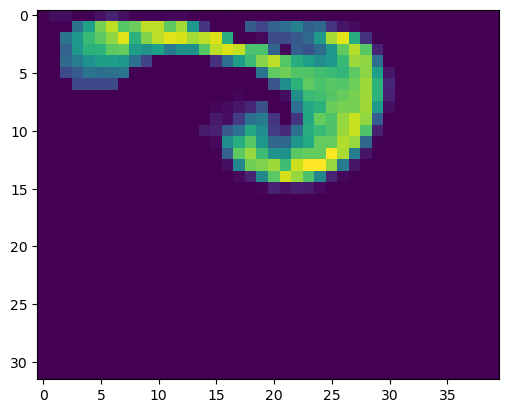

In [96]:
plt.imshow(a[0])